In [1]:
from cursdb import CursDB
from matplotlib import pyplot as plt

In [10]:
%matplotlib widget

In [2]:
db = CursDB("bnr.xml.db")


In [5]:
currencies = ["EUR", "USD", "GBP", "CAD", "INR"]
start_date = "2010-01-10"
end_date = "2023-02-01"

rows = list(
    db.select_rows(
        date=(start_date, end_date),
        currency=currencies,
        orderby="date",
    )
)

data = {
    c: [
        [dcv[0] for dcv in rows if dcv[1] == c],
        [dcv[2] for dcv in rows if dcv[1] == c],
    ]
    for c in currencies
}

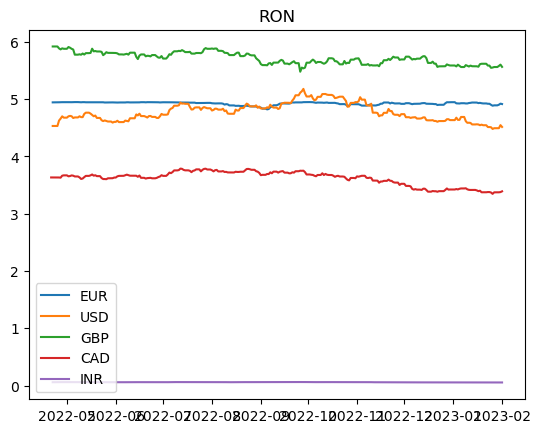

In [6]:
plt.clf()
for l,dv in data.items():
    plt.plot(dv[0], dv[1], label=l)

plt.legend()
plt.gca().set_title("RON")
plt.show()
